# Desafio - Meu primeiro modelo com Scikit-Learn

## Introdução

Faaala Dev,

Nesse desafio você reforçará de forma prática os **conceitos** que aprendemos nesse módulo.

Como se trata de um desafio, ele necessita de alguns conhecimentos além dos abordados nesse módulo, então é importante ter autonomia para conseguir pesquisar essas coisas caso não saiba como resolver. Por isso, lembre-se, t**enha calma** e **acredite no seu processo.**

O aprendizado daqui é muito importante e com certeza você conseguirá sair com muito conhecimento bacana 💜

## Sobre o desafio

De acordo com o que foi ensinado no módulo, iremos trabalhar com previsões de vendas de uma loja. O dicionário disponibilizado não é difícil de entender, porém deveremos contar com as implementações que vimos no módulo para:

- Tratar os dados
- Formatar (se necessário)
- Treinar o modelo
- Prever a venda de dezembro
- Montar um histograma dos dados
- Montar um plot de scatter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [3]:
df_vendas = pd.DataFrame.from_dict(dados_vendas)

In [4]:
df_vendas.head()

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600


In [5]:
def mesNumeral(nome_mes):
    meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
    try:
        numeroMes = meses.index(nome_mes.capitalize()) + 1
        return numeroMes
    except:
        return "Mes Invalido!"

In [6]:
df_vendas['NumMes'] = df_vendas.mes.apply(mesNumeral)

In [7]:
df_vendas.head(12)

,mes,vendas,NumMes
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [8]:
X = df_vendas[['NumMes']]
y=df_vendas.vendas

In [9]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.3, random_state=42)

In [10]:
model_1 = LinearRegression().fit(X_train, y_train)

In [11]:
y_pred = model_1.predict(X_test)

In [12]:
eqm = mean_squared_error(y_test,y_pred)
print(eqm)

6614.2204091998665


In [13]:
mae = mean_absolute_error(y_test,y_pred)
print(mae)

75.69721115537857


In [14]:
R2 = r2_score(y_test,y_pred)
print(eqm)

6614.2204091998665


In [15]:
model_1.intercept_

np.float64(1883.2669322709162)

In [16]:
model_1.coef_

array([121.51394422])

In [25]:
previsãoDezembro = model_1.predict([[12]])
print(f'Previsão de vendas para dezembro: {round(previsãoDezembro[0],2)}')

Previsão de vendas para dezembro: 3341.43


/home/ngiacomelli/.local/share/virtualenvs/ML_-_PREVISÃO_DE_VENDAS_LOJA-6QH5zaCR/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


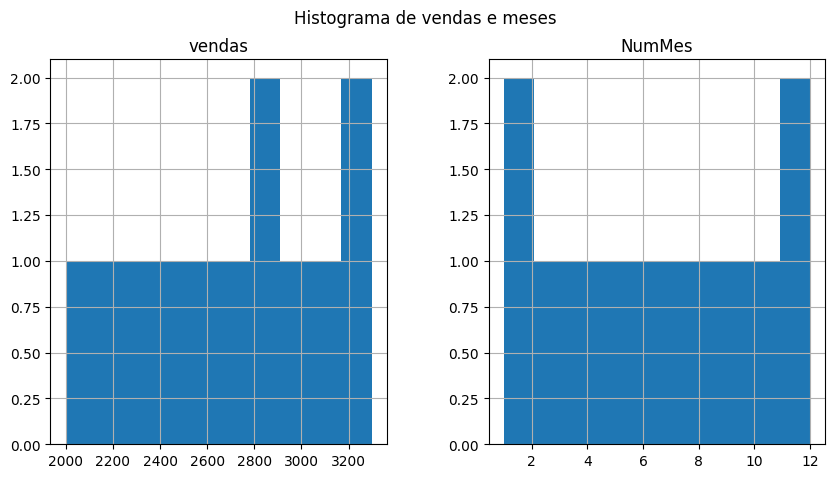

In [18]:
df_vendas.hist(bins=10, figsize=(10,5),grid=True)
plt.suptitle('Histograma de vendas e meses')
plt.show()

[]

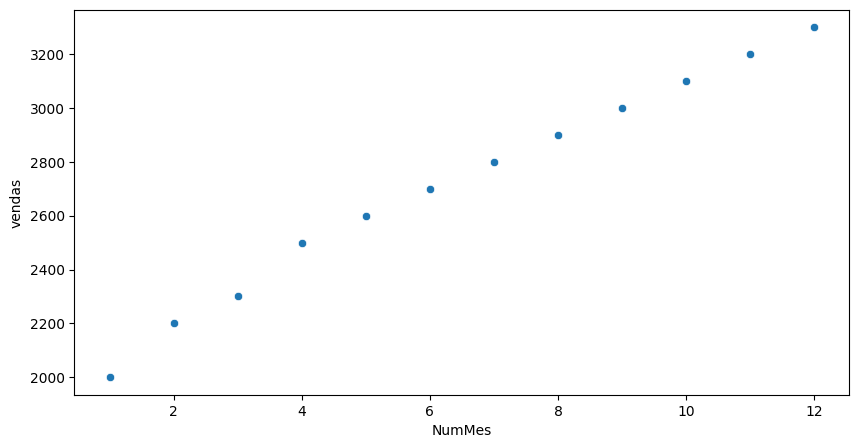

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='NumMes', y='vendas',data=df_vendas)
plt.plot()